<a href="https://colab.research.google.com/github/Athik2005/CT-PG/blob/main/Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


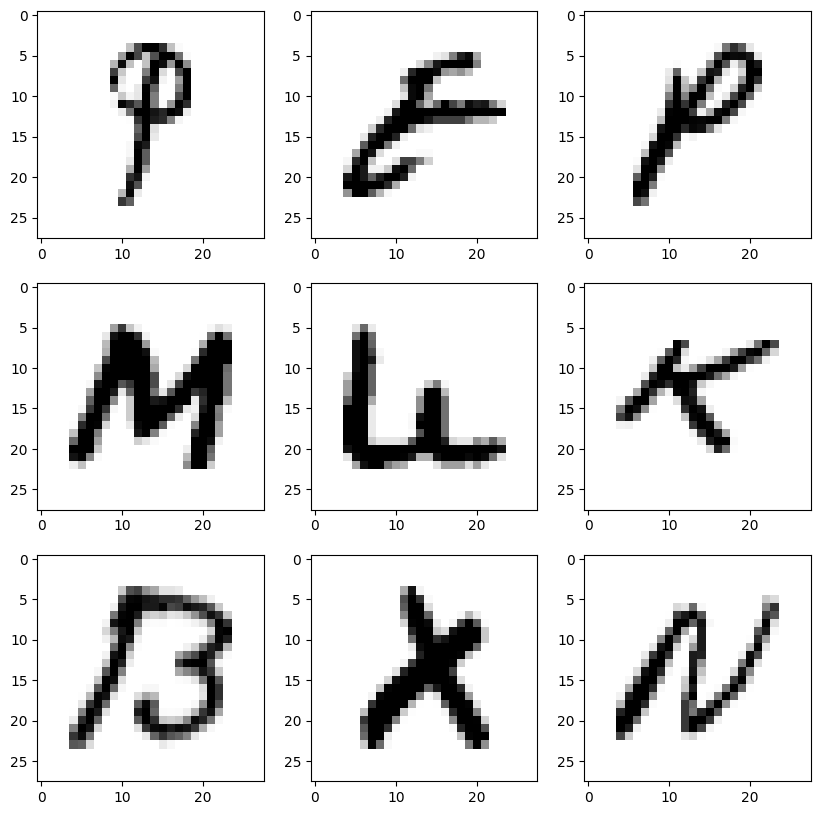

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)
New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 518s 55ms/step - accuracy: 0.8886 - loss: 0.4075 - val_accuracy: 0.9659 - val_loss: 0.1271
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 578s 57ms/step - accuracy: 0.9686 - loss: 0.1107 - val_accuracy: 0.9739 - val_loss: 0.1002
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 550s 56ms/step - accuracy: 0.9733 - loss: 0.0950 - val_accuracy: 0.9693 - val_loss: 0.1146
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 562s 56ms/step - accuracy: 0.9764 - loss: 0.0862 - val_accuracy: 0.9747 - val_loss: 0.0921
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 556s 55ms/step - accuracy: 0.9781 - loss: 0.0793 - val_accuracy: 0.9731 - val_loss: 0.1225


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,568 (1.40 MB)

 Trainable params: 122,522 (478.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,046 (957.21 KB)

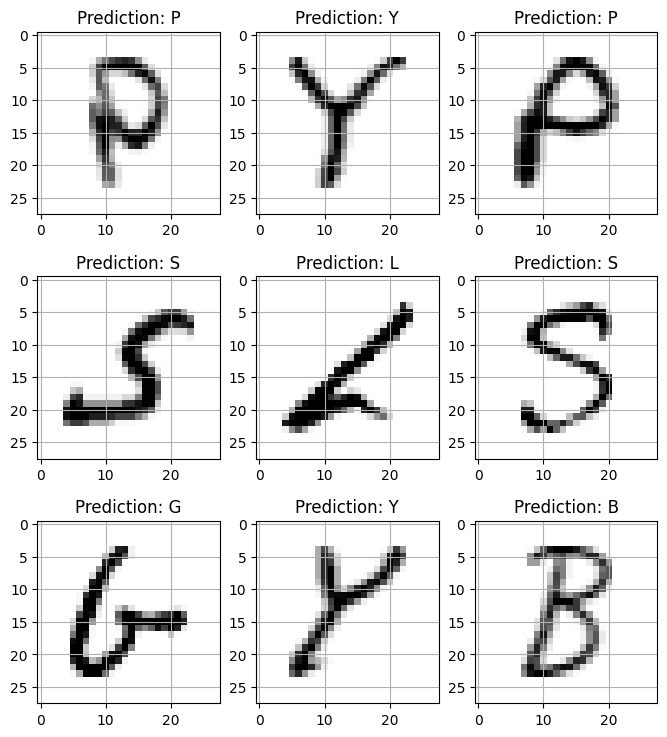

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/A_Z Handwritten Data.csv').astype('float32')
data.head(10)

X = data.drop('0',axis = 1)
y = data['0']

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

import cv2
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

import tensorflow
from tensorflow.keras.utils import to_categorical

y_training = to_categorical(y_train, num_classes = 26)
y_testing = to_categorical(y_test, num_classes = 26)

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

model.summary()

model.save(r'handwritten_character_recog_model.h5')

words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")

    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


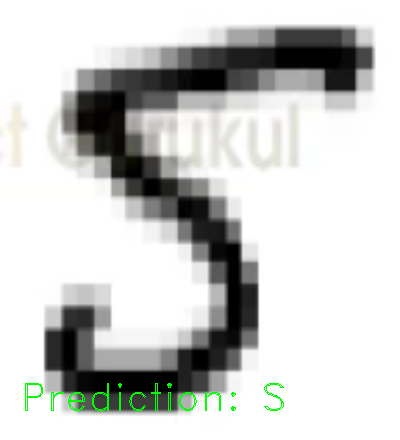

In [15]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model
from google.colab.patches import cv2_imshow # Import the cv2_imshow function from google.colab.patches

model = load_model('handwritten_character_recog_model.h5')

words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

image = cv2.imread('/content/drive/MyDrive/handwritten-character-recognition-source-code/Screenshot 2024-12-30 010110.png')
image_copy = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400,440))

image_copy = cv2.GaussianBlur(image_copy, (7,7), 0)
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

final_image = cv2.resize(img_thresh, (28,28))
final_image =np.reshape(final_image, (1,28,28,1))

prediction = words[np.argmax(model.predict(final_image))]

cv2.putText(image, "Prediction: " + prediction, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,255,0))
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow

# Remove the while loop and cv2.destroyAllWindows() as they are not needed with cv2_imshow
#while (1):
#    k = cv2.waitKey(1) & 0xFF
#    if k == 27:
#        break
#cv2.destroyAllWindows()

In [6]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('handwritten_character_recog_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('handwritten_character_recog_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpe0wj_4ss'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  140699696636752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699696633056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699697328224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699696849216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699699314752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699696847632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699697188000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699697191344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699697191168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699696687664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140699696685552:

In [10]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('handwritten_character_recog_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Specify the path where you want to save the model in your Google Drive
drive_path = '/content/drive/MyDrive/handwritten_character_recog_model.tflite'

# Save the TFLite model to the specified Google Drive path
with open(drive_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model saved to {drive_path}")


Saved artifact at '/tmp/tmp519jgoh9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  140705712436528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705712429840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705712435824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705712115552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705712126112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705712127520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705711220944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705711212320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705711214256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705711211088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140705711223056: